In [7]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from tqdm import tqdm_notebook as tqm
import tensorflow as tf

from subbatch import Subbatch
from dataset import Dataset, Batch, model, DatasetIndex, action

%matplotlib inline

In [8]:
BATCH_SIZE = 1000
MNIST_SIZE = 10000

ix = DatasetIndex(range(MNIST_SIZE))
dset = Dataset(ix, Subbatch)

In [9]:
iter_time = []
acc = []
times = []
rams = []
grid = np.arange(1,BATCH_SIZE+1)[(BATCH_SIZE % np.arange(1,BATCH_SIZE+1)) == 0][-5:]
for micro_batch_size in grid:
    memory = []
    num_subbatches = BATCH_SIZE // micro_batch_size
    tf.reset_default_graph()
    with tf.Session() as sess:
        ppl = (dset.p
               .init_variable("NUM_SUBBATCHES", num_subbatches)
               .init_variable("session", sess)
               .load()
               .train(iter_time, acc, memory)
              )

        for i in tqm(range(20)):
            ppl.next_batch(batch_size=BATCH_SIZE, shuffle=True, n_epochs=10)
        times.append(np.mean(iter_time))
        rams.append(np.mean(memory))

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

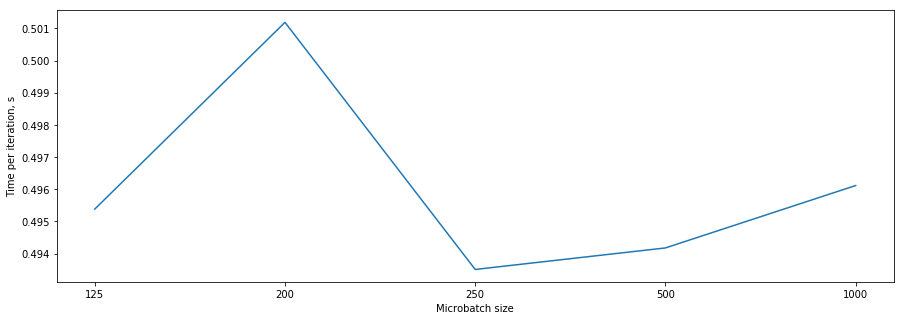

In [12]:
plt.figure(figsize = (15,5))
plt.plot(times)
plt.xticks(range(len(grid)), grid)
plt.xlabel('Microbatch size')
plt.ylabel('Time per iteration, s')
plt.show()

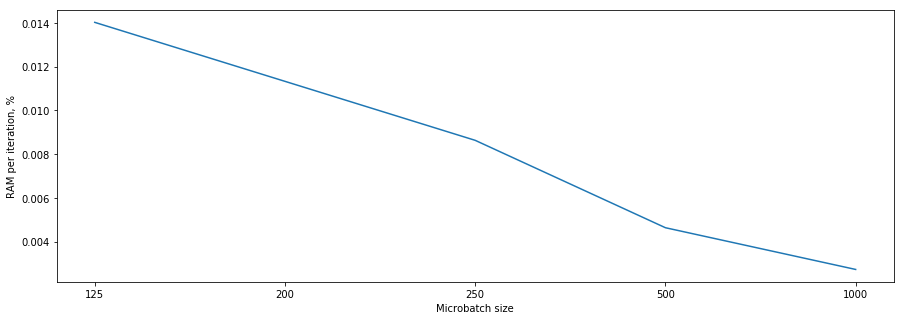

In [13]:
plt.figure(figsize = (15,5))
plt.plot(rams)
plt.xticks(range(len(grid)), grid)
plt.xlabel('Microbatch size')
plt.ylabel('RAM per iteration, %')
plt.show()